<a href="https://colab.research.google.com/github/Harikarthick28/Harikarthick28/blob/main/houseprice_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install numpy pandas matplotlib seaborn scikit-learn


In [40]:
import pandas as pd

df = pd.read_csv("Housing.csv")
df.head(10)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [41]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [43]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [44]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
list1 = ['mainroad',	'guestroom','	basement'	,'hotwaterheating','airconditioning','prefarea']

In [46]:
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[list1] = df[list1].replace({'yes':1,'no':0})

/tmp/ipython-input-3568434364.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[list1] = df[list1].replace({'yes':1,'no':0})


In [47]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [48]:
df['furnishingstatus'].nunique()

3

In [49]:
df['furnishingstatus']=df['furnishingstatus'].replace({'unfurnished':0,'semi-furnished':1,'furnished':2})

/tmp/ipython-input-3041164015.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus']=df['furnishingstatus'].replace({'unfurnished':0,'semi-furnished':1,'furnished':2})


In [50]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [51]:
from sklearn.preprocessing import StandardScaler



In [52]:
scaler = StandardScaler()

In [53]:
sc = ['price', 'area']

In [54]:
df = pd.read_csv("Housing.csv")

In [55]:
df[sc] = scaler.fit_transform(df[sc])

In [56]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,4.004484,1.757010,4,4,4,yes,no,no,no,yes,3,no,furnished
2,4.004484,2.218232,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,3.985755,1.083624,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,3.554979,1.046726,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [57]:
df.dtypes

,0
price,float64
area,float64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [60]:
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[list1] = df[list1].replace({'yes':1,'no':0})
df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished':0,'semi-furnished':1,'furnished':2})
corr_matrix = df.corr()

/tmp/ipython-input-2572166281.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[list1] = df[list1].replace({'yes':1,'no':0})
/tmp/ipython-input-2572166281.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace({'unfurnished':0,'semi-furnished':1,'furnished':2})


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

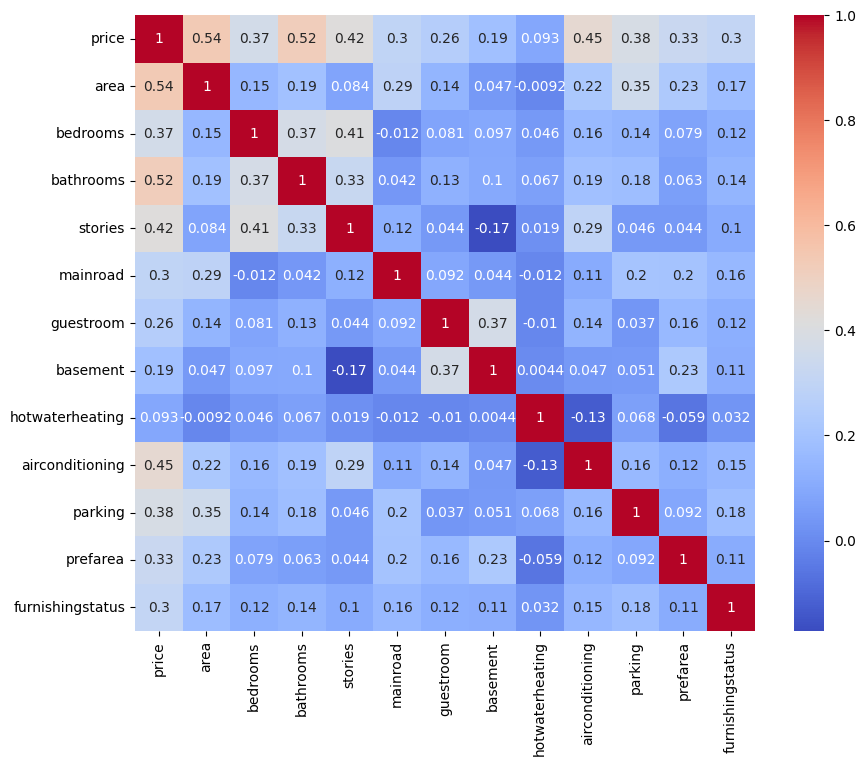

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

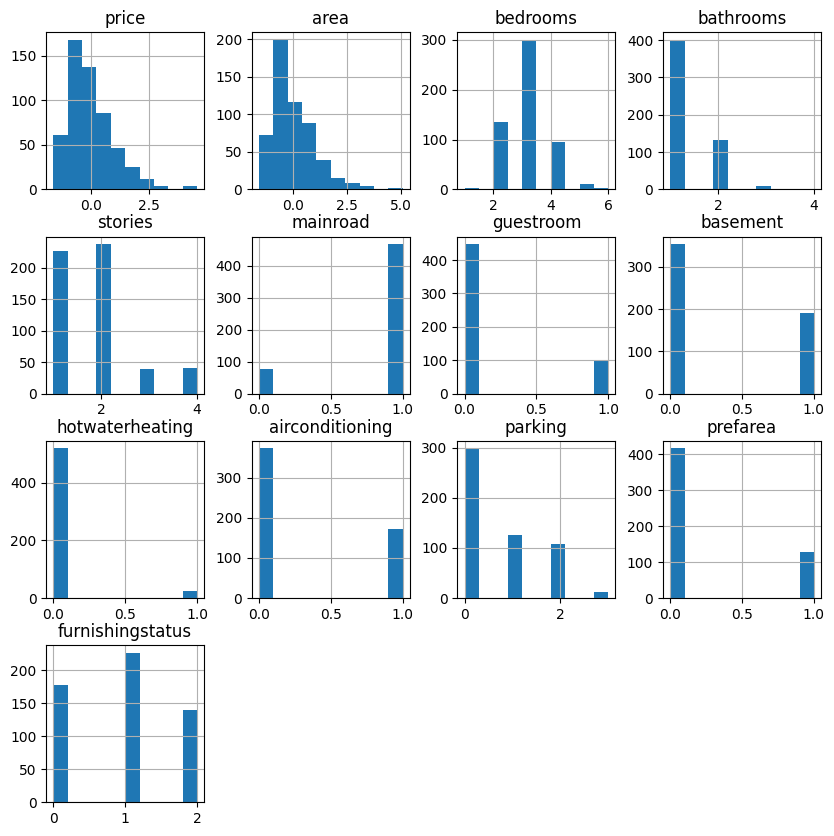

In [63]:
df.hist(figsize=(10, 10), bins=10)

In [64]:
x=df.drop('price',axis=1)
y=df['price']

In [65]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,4,2,3,1,0,0,0,1,2,1,2
1,1.757010,4,4,4,1,0,0,0,1,3,0,2
2,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,1.083624,4,2,2,1,0,1,0,1,3,1,2
4,1.046726,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,2,1,1,1,0,1,0,0,2,0,0
541,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,-0.705921,2,1,1,1,0,0,0,0,0,0,0
543,-1.033389,3,1,1,0,0,0,0,0,0,0,2


In [66]:
y

,price
0,4.566365
1,4.004484
2,4.004484
3,3.985755
4,3.554979
...,...
540,-1.576868
541,-1.605149
542,-1.614327
543,-1.614327


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
y_predict=lr.predict(x_test)

In [75]:
from sklearn.metrics import r2_score

In [76]:
lr_accuracy=r2_score(y_test,y_predict)

In [78]:
lr_accuracy*100

64.94754192267794